### Introduction :
Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

### Practice Skills
Creative feature engineering 
Advanced regression techniques like random forest and gradient boosting

### Acknowledgments
The Ames Housing dataset was compiled by Dean De Cock for use in data science education. It's an incredible alternative for data scientists looking for a modernized and expanded version of the often cited Boston Housing dataset. 

### Data :
train.csv and test.csv was provided by kaggle.

### Project Goals :
The objective of this challenge is to use our knowledge of machine learning and data science to predict house prices.

### Data :
In this project, we will use the train.csv data to form the model and test.csv to test our model.
Each column in the dataset represents a characteristic and each row is a sample.

### Analysis : 
In this project we will use our knowledge of descriptive statistics and data visualisation to summarise the data. As we have to make a prediction, we will use regression algorithms typical of supervised learning.

### Evaluation :
We will use test data for evaluation and the r2 score as a metric for our evaluation on test data.

### Import of modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

### Collecting the data 

In [2]:
#train_data
train_data = pd.read_csv("train.csv")
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
X_train_ = train_data.drop("SalePrice", axis = 1)
X_train_

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


In [4]:
y_ = train_data.loc[:,"SalePrice"]
y_

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [5]:
#Train_data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
#Test_data
test_data = pd.read_csv("test.csv")
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

### Data exploration

In [8]:
#sns.pairplot(data = train_data)

##### Because of the number of features on both sides, we will use principal component analysis to make a good visualization of the data.

In [9]:
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector as selector

In [10]:
categorical_features = X_train_.select_dtypes(include="object").columns
numeric_features = X_train_.select_dtypes(exclude="object").columns
categorical_features

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [11]:
numeric_features

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [12]:

categorical_features = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition']

numeric_features =['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold']

# Scale numeric values
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# One-hot encode categorical values
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, selector(dtype_include='float64')),
        ('cat', cat_transformer, selector(dtype_include='category'))])
X_train, X_test, y_train, y_test = train_test_split(X_train_, y_, test_size=0.2,
                                                    random_state=0)

In [13]:
housing_scared = preprocessor.fit_transform(X_train)
housing_pca = PCA()
components = housing_pca.fit_transform(housing_scared)
#components = pd.DataFrame(components).transpose()
var_ratio = housing_pca.explained_variance_ratio_
print(var_ratio)
housing_pcomp = pd.DataFrame(components)
housing_pcomp = housing_pcomp.iloc[:,0:2]
housing_pcomp.columns = ['Comp1', 'Comp2']
print(housing_pcomp.head())

[0.44006144 0.3148389  0.24509966]
      Comp1     Comp2
0  2.427752  0.046970
1 -0.979238  0.003048
2 -1.576714  1.681734
3  0.745894 -0.541808
4  1.756796  1.502401


In [14]:
print(components)
housing_pcomp = pd.DataFrame(components)
housing_pcomp = housing_pcomp.iloc[:,0:3]
housing_pcomp.columns = ['Comp1', 'Comp2', "Comp3"]
print(housing_pcomp.head())

[[ 2.42775179e+00  4.69703570e-02  3.99610117e-01]
 [-9.79237511e-01  3.04804058e-03  1.24365462e-01]
 [-1.57671398e+00  1.68173370e+00  9.08328967e-01]
 ...
 [-4.14378931e-01  9.73729827e-04 -3.90616655e-01]
 [ 2.93004970e-01 -4.87780935e-01 -9.70579430e-01]
 [-1.78075906e-02 -8.45239901e-01 -6.48827478e-01]]
      Comp1     Comp2     Comp3
0  2.427752  0.046970  0.399610
1 -0.979238  0.003048  0.124365
2 -1.576714  1.681734  0.908329
3  0.745894 -0.541808 -0.420741
4  1.756796  1.502401 -1.035206


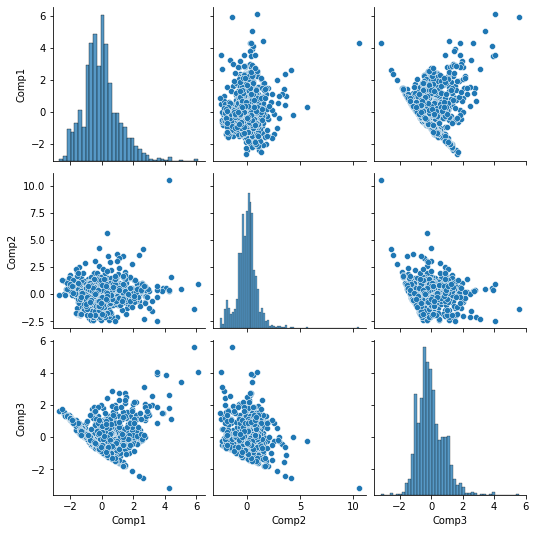

In [15]:
sns.pairplot(housing_pcomp)

In [16]:
#housing_pcomp.head()
X_train = housing_pcomp.loc[:,:].values
X_train.shape

(1168, 3)

#### For the modelling we will use the following regression algorithms: 
1.k-nearest-neighbour

2.Linear regression;

3.Decision trees

4.Random forests;

In [17]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#### Linear regression

In [18]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [19]:
lin_reg.score(X_train, y_train)

0.4398744688194869

#### K-nearest-neighbour

In [20]:
k_nearest =  KNeighborsRegressor()
k_nearest.fit(X_train, y_train)

KNeighborsRegressor()

In [21]:
k_nearest.score(X_train, y_train)

0.6519980645549207

#### Decision trees

In [22]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [23]:
tree_reg.score(X_train, y_train)

0.9528251413219404

#### Random Forests

In [24]:
random_forest_reg = RandomForestRegressor(random_state = 0, n_estimators = 100, max_features =2)
random_forest_reg.fit(X_train, y_train)

RandomForestRegressor(max_features=2, random_state=0)

In [25]:
random_forest_reg.score(X_train, y_train)

0.8906428864352384

#### Ridge Regression

In [26]:
ridge_reg = Ridge(alpha = 0.5)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=0.5)

In [27]:
ridge_reg.score(X_train, y_train)

0.43987442231503915

#### Gradient Boosting Regressor 

In [28]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)

GradientBoostingRegressor(random_state=0)

In [29]:
reg.score(X_train, y_train)

0.71903072322718

####  Let's improve evaluation through cross-validation.

In [30]:
from sklearn.model_selection import cross_val_score

#### Cross-validation for linear regression

In [31]:
scores = cross_val_score(lin_reg, X_train, y_train, cv=5)

In [32]:
scores.mean()

0.41888832707181756

#### Cross-validation for K-nearest-neighbour

In [33]:
scores = cross_val_score(k_nearest, X_train, y_train, cv=5)

In [34]:
scores.mean()

0.45114484702488167

#### Cross-validation for decision trees

In [35]:
scores = cross_val_score(tree_reg, X_train, y_train, scoring = "r2", cv=5)

In [36]:
scores.mean()

0.02727989000612847

#### Cross-validation for random forest

In [37]:
scores = cross_val_score(random_forest_reg, X_train, y_train, cv=5)
scores.mean()

0.4028629959235281

#### Cross-validation with gradient boosting regressor

In [38]:
scores = cross_val_score(reg, X_train, y_train, cv=5)
scores.mean()

0.4247067867721045

#### Let's use grid search to set the parameters of our nearest neighbour algorithm

In [39]:
from sklearn.model_selection import GridSearchCV
param_grid = [
{'n_neighbors': list(range(1,101))}
]

k_nearest =  KNeighborsRegressor()
grid_search = GridSearchCV(k_nearest, param_grid, cv=5,
scoring='r2')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]}],
             scoring='r2')

In [40]:
grid_search.best_params_

{'n_neighbors': 21}

In [41]:
grid_search.best_estimator_

KNeighborsRegressor(n_neighbors=21)

### Evaluation on the test set 

In [42]:
housing_scared_test = preprocessor.transform(X_test)
components = housing_pca.transform(housing_scared_test)
var_ratio = housing_pca.explained_variance_ratio_
print(var_ratio)
print(components)
housing_pcomp = pd.DataFrame(components)
housing_pcomp = housing_pcomp.iloc[:,0:3]
housing_pcomp.columns = ['Comp1', 'Comp2', "Comp3"]
print(housing_pcomp.head())

final_model = grid_search.best_estimator_


[0.44006144 0.3148389  0.24509966]
[[-4.67822406e-01  1.04657122e-01 -3.27124062e-01]
 [-1.10149779e+00  1.22464519e+00  4.10094157e-01]
 [-4.96464789e-01  5.31714650e-01  9.61485636e-01]
 [ 9.74323226e-01  4.69453818e-01  6.42368211e-01]
 [-1.74414237e-01 -2.01470874e+00  1.94654785e+00]
 [-1.12809847e+00  1.27779258e-01  2.77803892e-01]
 [ 2.15029550e-01 -1.43527391e+00 -5.42173622e-01]
 [-7.67334835e-01 -7.63534911e-01 -1.78110540e-01]
 [ 1.96300826e+00  3.42801617e+00 -2.06778112e+00]
 [ 2.51672218e-01 -4.98210429e-01 -1.06874314e+00]
 [-1.60421541e-01 -1.44877874e+00 -8.28903608e-01]
 [ 1.59623176e-01 -1.05137993e-02  3.08684215e-01]
 [ 1.39168597e+00 -5.92240555e-01  4.46409926e-01]
 [-6.87290685e-01  2.29647628e-01 -1.09312868e-01]
 [-5.69610859e-01  1.75534064e-01  1.31314796e+00]
 [-8.93418273e-01  5.20168558e-01  1.19964605e-01]
 [ 7.51456438e-01  1.32132778e+00 -1.26447790e+00]
 [-5.57464800e-01 -3.50357075e-01 -3.10376755e-01]
 [-6.91113841e-01  2.91753948e-01 -9.69664176e-

In [43]:
print("Test score : {}".format(final_model.score(housing_pcomp, y_test)))

Test score : 0.43494147319735565


In [44]:
#test_data = 
housing_scared_test = preprocessor.transform(test_data)
components = housing_pca.transform(housing_scared_test)
var_ratio = housing_pca.explained_variance_ratio_
print(var_ratio)
print(components)
housing_pcomp = pd.DataFrame(components)
housing_pcomp = housing_pcomp.iloc[:,0:3]
housing_pcomp.columns = ['Comp1', 'Comp2', "Comp3"]
print(housing_pcomp.head())

final_model = grid_search.best_estimator_

[0.44006144 0.3148389  0.24509966]
[[-0.5843076   0.85019225 -0.1145939 ]
 [-0.2408936   0.89172139  0.38444251]
 [ 0.18293612 -0.14610176 -0.95586474]
 ...
 [ 1.06984252  4.17640347 -1.14715054]
 [-0.51549079 -0.26772151 -0.33683   ]
 [ 0.42910847 -0.11704483 -0.47448803]]
      Comp1     Comp2     Comp3
0 -0.584308  0.850192 -0.114594
1 -0.240894  0.891721  0.384443
2  0.182936 -0.146102 -0.955865
3  0.365186 -0.013129 -0.953688
4 -0.591712 -1.323010 -0.417974


In [45]:
test_data_ = final_model.predict(housing_pcomp)

In [46]:
test_data_

array([148767.04761905, 147547.61904762, 192426.19047619, ...,
       187358.33333333, 117234.38095238, 198942.85714286])

In [47]:
test_data_csv = pd.DataFrame({
    "Id" : test_data.loc[:,"Id"],
    "SalePrice" : test_data_
})

In [48]:
test_data_csv

,Id,SalePrice
0,1461,148767.047619
1,1462,147547.619048
2,1463,192426.190476
3,1464,198644.380952
4,1465,184290.476190
...,...,...
1454,2915,121261.904762
1455,2916,112638.095238
1456,2917,187358.333333
1457,2918,117234.380952


In [49]:
test_data_csv.to_csv("submission.csv", encoding='utf-8', index = False)